# Exploratory Data Analysis (EDA) Project in Python.

__Topic__ : To analyze the population of honey bees in the United States from 2015 to 2022.

__Objective__ : To visualize how the population of honey bees has been decreasing at alarming rates over the years (2015 to 2022) in United States.

__Key questions to be answered :__
- How the population of honey bees decreased from 2015 to 2022?
- In which year did honey bees lose the most colonies?

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__Reading the dataset__

In [2]:
df = pd.read_csv("save_the_bees.csv")

__View the first few rows of the dataset__

In [13]:
df.head(10)

,state,state_code,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
0,Alabama,AL,7000,7000,1800,26,2800,250,4,1,2015,10.0,5.4,0.0,2.2,9.1,9.4
1,Arizona,AZ,35000,35000,4600,13,3400,2100,6,1,2015,26.9,20.5,0.1,0.0,1.8,3.1
2,Arkansas,AR,13000,14000,1500,11,1200,90,1,1,2015,17.6,11.4,1.5,3.4,1.0,1.0
3,California,CA,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,7.2,3.0,7.5,6.5,2.8
4,Colorado,CO,3500,12500,1500,12,200,140,1,1,2015,14.6,0.9,1.8,0.6,2.6,5.9
5,Connecticut,CT,3900,3900,870,22,290,0,0,1,2015,2.5,1.4,0.0,0.0,21.2,2.4
6,Florida,FL,305000,315000,42000,13,54000,25000,8,1,2015,22.3,13.5,0.8,8.9,5.1,4.4
7,Georgia,GA,104000,105000,14500,14,47000,9500,9,1,2015,6.2,4.9,3.3,2.6,4.8,10.5
8,Hawaii,HI,10500,10500,380,4,3400,760,7,1,2015,38.8,37.7,1.6,0.0,2.0,0.0
9,Idaho,ID,81000,88000,3700,4,2600,8000,9,1,2015,39.8,6.7,12.5,4.8,8.9,4.9


In [17]:
df.isna().sum()

state                        0
state_code                   0
num_colonies                 0
max_colonies                 0
lost_colonies                0
percent_lost                 0
added_colonies               0
renovated_colonies           0
percent_renovated            0
quarter                      0
year                         0
varroa_mites                 0
other_pests_and_parasites    0
diseases                     0
pesticides                   0
other                        0
unknown                      0
dtype: int64

__Observation :__ The dataset looks clean and there are no null values

In [20]:
df.shape

(1453, 17)

__Observation :__ There are 1453 rows and 17 columns

In [18]:
df.dtypes

state                         object
state_code                    object
num_colonies                   int64
max_colonies                   int64
lost_colonies                  int64
percent_lost                   int64
added_colonies                 int64
renovated_colonies             int64
percent_renovated              int64
quarter                        int64
year                           int64
varroa_mites                 float64
other_pests_and_parasites    float64
diseases                     float64
pesticides                   float64
other                        float64
unknown                      float64
dtype: object

__Observation :__ quater and year is integer type currently. Since they are categorial vairable here, we will convert it into category data type

In [26]:
df["quarter"] = df["quarter"].astype("category")
df["year"] = df["year"].astype("category")

In [27]:
df.dtypes

state                          object
state_code                     object
num_colonies                    int64
max_colonies                    int64
lost_colonies                   int64
percent_lost                    int64
added_colonies                  int64
renovated_colonies              int64
percent_renovated               int64
quarter                      category
year                         category
varroa_mites                  float64
other_pests_and_parasites     float64
diseases                      float64
pesticides                    float64
other                         float64
unknown                       float64
dtype: object

__Analysing the quantitative variable in the dataset__

In [28]:
df.describe()

,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
count,1.453000e+03,1.453000e+03,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,1.244700e+05,1.559487e+05,16759.710943,11.266345,15744.900206,13520.302822,7.112870,30.186098,10.937509,3.406676,6.185272,6.083345,3.994907
std,4.384997e+05,5.505931e+05,60681.042329,7.359984,63548.439090,57201.973644,9.025198,18.861293,13.035092,6.472063,8.959392,6.488208,4.939563
min,1.300000e+03,1.300000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+03,9.500000e+03,950.000000,6.000000,380.000000,150.000000,1.000000,15.600000,1.900000,0.100000,0.400000,1.800000,0.800000
50%,1.850000e+04,2.300000e+04,2200.000000,10.000000,1500.000000,800.000000,4.000000,27.200000,7.000000,1.100000,2.600000,4.100000,2.400000
75%,5.900000e+04,7.900000e+04,7000.000000,14.000000,6000.000000,3700.000000,10.000000,42.200000,15.100000,4.200000,8.500000,8.200000,5.400000
max,3.181180e+06,4.174440e+06,502350.000000,65.000000,736920.000000,762550.000000,77.000000,98.800000,91.900000,87.400000,73.500000,61.400000,46.200000


__Checking which year honey bees lose the most colonies__

C:\Users\ashis\AppData\Local\Temp\ipykernel_9472\1626793977.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_sum = df.groupby("year")["lost_colonies"].sum()


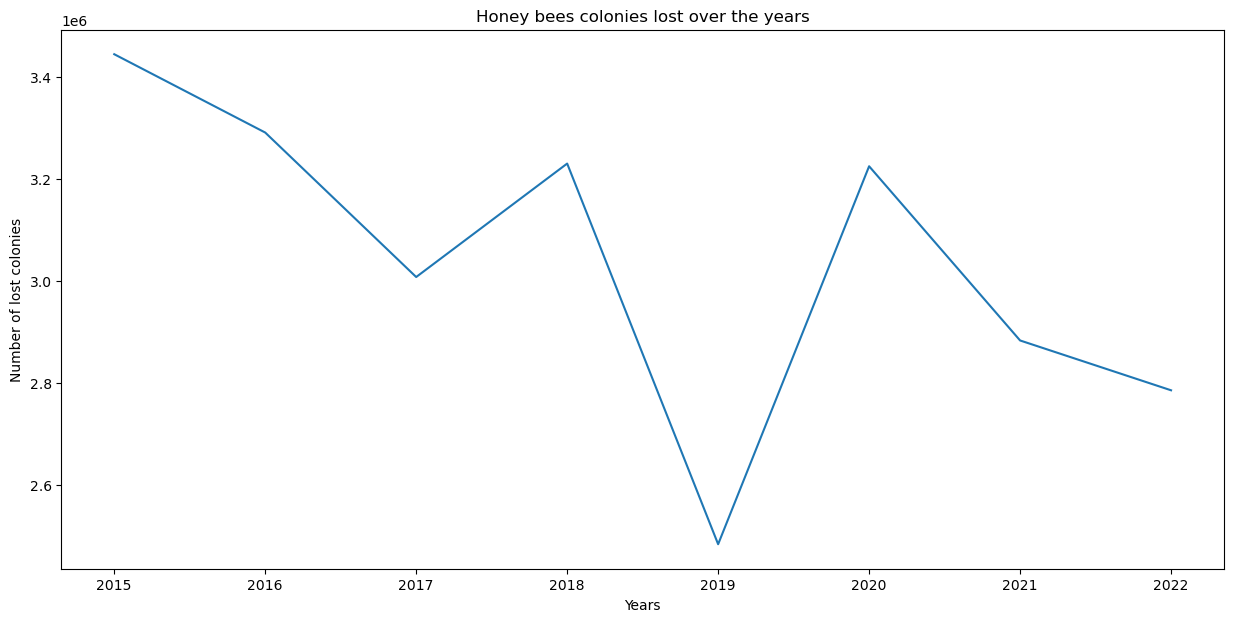

In [59]:
yearly_sum = df.groupby("year")["lost_colonies"].sum()
unique_years = df["year"].unique()
plt.figure(figsize=(15, 7))
plt.plot(unique_years, yearly_sum)
plt.title("Honey bees colonies lost over the years")
plt.xlabel("Years")
plt.ylabel("Number of lost colonies")
plt.show()

__Observation :__
1. Honey bees lost the most colonies in the year of 2015
2. Honey bees lost the least colonies in the year of 2019